In [1]:
import pandas as pd

In [9]:
depth_hypo_df = pd.read_csv('ids_to_pvalue.csv', index_col=0)

In [10]:
depth_hypo_df

,ids,pvalue_less,pvalue_greater
0,346,0.0001,1.0000
1,398,1.0000,1.0000
2,451,1.0000,1.0000
3,480,0.0001,1.0000
4,488,1.0000,1.0000
...,...,...,...
48598,169338,1.0000,1.0000
48599,169339,1.0000,0.0001
48600,169340,0.0256,0.9948
48601,169341,1.0000,1.0000


In [12]:
def get_class(row):
    """
    Return one of three classes - 
            0 - The nodes perform better with shallow depth
            1 - The nodes performance is indifferent to depth
            2 - The nodes perform better with deep depth.
    """
    SIG_LEVEL = 0.05
    pvalue_prefer_shallow = row.pvalue_less
    pvalue_prefer_deep = row.pvalue_greater
    
    if pvalue_prefer_shallow >= SIG_LEVEL and pvalue_prefer_deep >= SIG_LEVEL:
        return 1
    elif pvalue_prefer_shallow < SIG_LEVEL:
        return 0
    else:
        return 2

In [18]:
nodes_classes_df = pd.DataFrame()
nodes_classes_df['id'] = depth_hypo_df['ids']
nodes_classes_df['class'] = depth_hypo_df.apply(get_class, axis=1)

<AxesSubplot:>

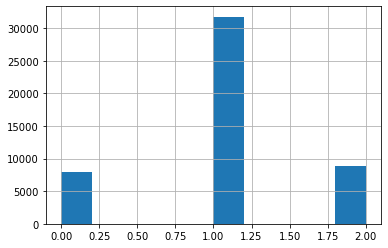

In [21]:
nodes_classes_df['class'].hist()

In [24]:
nodes_classes_df.to_csv('id_to_class.csv', index=False)